In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rediscovery_rate
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Old data frame

In [2]:
fpath = '../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv'
usecols = range(6)
merged = pd.read_csv(fpath, index_col=0, skiprows=1, usecols=usecols).rename_axis('drug_chembl_id', axis=0)
fpath = '../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv'
sel_gsets = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4', 'APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
merged_ranks = pd.read_csv(fpath, index_col=0, header=[0, 1]).rename_axis('drug_chembl_id', axis=0).xs('rank', axis=1, level=1)[sel_gsets]
fpath = '../../results/2021-12-13-chembl-drug-info/drug-indication.csv'
indications = pd.read_csv(fpath, index_col='drug_chembl_id')
# D000544 is Alzheimer disease
mp4ad = indications.loc[indications.mesh_id == 'D000544', ['max_phase_for_ind']].rename({'max_phase_for_ind': 'max_phase_for_AD'}, axis=1)
fpath = '../../results/2021-12-13-chembl-drug-info/drug-info-bbb.csv'
info_bbb = pd.read_csv(fpath, index_col=0).drop(['drug_name'], axis=1)
fpath = '../../results/2022-01-14-rank-aggregation/aggregated-ranks.csv'
agg_ranks = pd.read_csv(fpath, index_col='rank')
top_drugs = pd.DataFrame({'aggregate rank': agg_ranks.index}, index=agg_ranks.MC3).rename_axis('drug_chembl_id', axis=0)
drugs = pd.merge(merged, info_bbb, how='left', on='drug_chembl_id')
drugs = pd.merge(drugs, mp4ad, how='left', on='drug_chembl_id')
drugs = pd.merge(drugs, top_drugs, how='left', on='drug_chembl_id')
drugs = pd.merge(drugs, merged_ranks, how='left', on='drug_chembl_id')
drugs = drugs.sort_values('aggregate rank')

## New data frames

In [3]:
drugs_rmta = rediscovery_rate.make_drugs_df(screenpath='../../results/proximity-runs/rmta-apoe3-apoe4/rmta-apoe3-apoe4.csv', sort_by_z=True)

In [4]:
drugs_aggreg = rediscovery_rate.make_drugs_df(screenpath='../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv', sort_by_z=False)
fpath = '../../results/2022-01-14-rank-aggregation/aggregated-ranks.csv'
agg_ranks = pd.read_csv(fpath, index_col='rank')
top_drugs = pd.DataFrame({'aggregate rank': agg_ranks.index}, index=agg_ranks.MC3).rename_axis('drug_chembl_id', axis=0)
drugs_aggreg = pd.merge(drugs_aggreg, top_drugs, how='left', on='drug_chembl_id')
drugs_aggreg = drugs_aggreg.sort_values('aggregate rank')

## Testing

In [35]:
def top_bottom(drugs=drugs, topk=100, min_max_phase_for_ind=1, ind_col='max_phase_for_AD'):
    bottoml = drugs['aggregate rank'].count()
    #bottomk = len(drugs) - topk
    df = drugs.copy()
    df['tested4AD'] = drugs[ind_col] >= min_max_phase_for_ind
    top = df.iloc[:topk]
    bottom = df.iloc[-bottoml:]
    top_avg, bottom_avg = [df.loc[df['tested4AD'], ind_col].sum() / xk for df, xk in zip([top, bottom], [topk, bottoml])]
    ratio = top_avg / bottom_avg
    return(ratio)

top_bottom(drugs), top_bottom(drugs_aggreg)

(2.8089473684210526, 2.8089473684210526)

In [37]:
rediscovery_rate.rel_rediscovery_rate(drugs, bottoml=593)

2.8089473684210526

In [40]:
rrrs = rediscovery_rate.rel_rediscovery_rates(drugs, bottoml=593)#.plot(kind='scatter', x='top-t', y='rel rediscovery rate')
rrrs.head()

,top-t,rel rediscovery rate
0,10,0.000000
1,20,3.121053
2,30,2.080702
3,40,2.730921
4,50,2.184737


<AxesSubplot:xlabel='top-t', ylabel='rel rediscovery rate'>

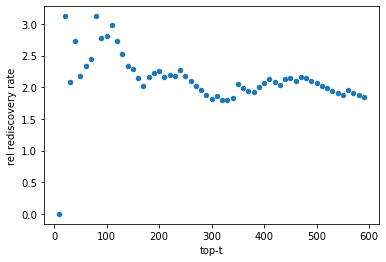

In [41]:
rrrs.plot(kind='scatter', x='top-t', y='rel rediscovery rate')

In [6]:
%connect_info

{
  "shell_port": 56635,
  "iopub_port": 56636,
  "stdin_port": 56637,
  "control_port": 56639,
  "hb_port": 56638,
  "ip": "127.0.0.1",
  "key": "fdd013eb-793a5dbf4b7c272106367735",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ef087fb0-9dab-4acf-9d0f-dcfd7d48cde6.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
